<a href="https://colab.research.google.com/github/rrvenkatrama/python-data-analysis/blob/main/Rajesh_Ramani_Python_Data_Analysis_Project_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proposal



## Introduction
### 1. Data set

I am planning to use the Automobile data set from UCI ML Repository: https://archive.ics.uci.edu/dataset/10/automobile

This data set is collected from 1985 Ward's Automotive Yearbook, which is a book of automobile statistics.

### 2. Citation
Schlimmer, J. (1985). Automobile [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5B01C.

### 3. What the data set represents (cases/features)

The dataset contains, for various car makes,  models and configurations the following:


* The make and model of the car
* The technical specs for the car
* Normalized insurance losses information (average insurance claims per dollar value of the car per year)
* Symboling (adjusted risk factors for insurance purposes)
* Price of the particular configuration

There may be multiple rows for the same make and model, identifying data for various configurations.

Each row represents insurance risk data for a specific make, model and a configuration  (number of cyl, fuel type, aspiration, number of doors, body-style, drive wheels, engine types, cylinders etc)

### 4. Why this data set ?
This interesting dataset has a robust set of multivariate features (26) and enough data samples (205) for data analysis.  There are lots of interesting variables and their relations to study. This data set also appears to be conducive for linear regression.

### 5. Description of the data
**The data has 11 categorical values:**

Symboling (ordinal categorical), make,	fuel-type,	aspiration,	num-of-doors,	body-style,	drive-wheels,	engine-location, engine-type,	num-of-cylinders and fuel-system

**The data has 15 continuous variables:**
symboling, normalized-losses,   wheel-base,	length,	width,	height,	curb-weight,  bore,	stroke,	compression-ratio,	horsepower,	peak-rpm,	city-mpg,	highway-mpg,	price and engine-size

### 6. Variables I will be studying

Out of the 26 varibales, the ones I am currently interested in studying are:



* Make and Model
* Normalized losses
* Symboling
* Horsepower
* Vehicle price
* Body style
* Number of cylinders
* Drive-type (RWD/4WD/FWD etc)

**If there are other variables that play a role in the data analysis/decision making, I will include them as needed...**


### 7. Type of study

This is an observational study because data was collected from real world observations and presented as is, without any manipulation of features or variable.

### 8. Questions I would like answered from the data (preliminary)

Let's say it's 1985 ad I want to start a rental car business and evaluating this data from an insurance standpoint to make some key decisions in terms of the least risky vehicles to offer customers that will lower premiums and repair times.

1. Is there a correlation between vehicle cost and symboling (safety adjustments) ?
2. Does the type of body-style have any relation to normalized losses (which could indicate some body types like sedan may be safer and carry lesser premiums than say a coupe) ?
3. How does the horsepower affect price of the vehicle as well as normalized losses ? For exmaple do higher horsepower vehicles have more normalized losses which could indicate those vecicles carry a higher premium and risk factor as well as higher losses could indicate poor driving patterns with those cars.
4. Do certain drive types lower normalized losses ? e.g. Do FWD or AWD vehicles generally safer than RWD vehicles ?

### 9. Data quality checks (missing values/outliers)

1. About 20% of the datapoints don't have the normalied losses values.
2. A small number of data points don't have price populated.
3. (3) out of (205) datapoints (pertaining to Porsche) have engine in the rear. All the other datapoints/vehicles have engines in the front.

**Action: Removing datapoints that have null values for normalized-losses. **




# Data Loading from source

In [ ]:


!pip install ucimlrepo


In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
automobile = fetch_ucirepo(id=10)

# data (as pandas dataframes)
X = automobile.data.features
y = automobile.data.targets

# metadata
print(automobile.metadata)

# variable information
print(automobile.variables)



{'uci_id': 10, 'name': 'Automobile', 'repository_url': 'https://archive.ics.uci.edu/dataset/10/automobile', 'data_url': 'https://archive.ics.uci.edu/static/public/10/data.csv', 'abstract': "From 1985 Ward's Automotive Yearbook", 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 205, 'num_features': 25, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['symboling'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1985, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5B01C', 'creators': ['Jeffrey Schlimmer'], 'intro_paper': None, 'additional_info': {'summary': 'This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.  The second rating corresponds to the degree to which th

#Preliminary Data analysis (Descriptive stats/summary/outliers)

In [ ]:
autodata.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
3,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0,2
4,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0,2
6,158.0,audi,gas,std,4.0,sedan,fwd,front,105.8,192.7,...,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,17710.0,1
8,158.0,audi,gas,turbo,4.0,sedan,fwd,front,105.8,192.7,...,mpfi,3.13,3.4,8.3,140.0,5500.0,17,20,23875.0,1
10,192.0,bmw,gas,std,2.0,sedan,rwd,front,101.2,176.8,...,mpfi,3.50,2.8,8.8,101.0,5800.0,23,29,16430.0,2


## Cleanup data by removing rows with NaN normalized-losses

In [ ]:
## Cleanup data point with null normalized-values
import matplotlib.pyplot as plot
import pandas as pd
import numpy as np

autodata = automobile.data.original.copy()

autodata = autodata.dropna(subset=['normalized-losses'])
autodata.shape

(164, 26)

## Summary stats for Normalized-Losses by vehicle type

In [ ]:



autodata.groupby('make')['normalized-losses'].describe()



,count,mean,std,min,25%,50%,75%,max
make,,,,,,,,
audi,4.0,161.000000,3.464102,158.0,158.0,161.0,164.0,164.0
bmw,4.0,190.000000,2.309401,188.0,188.0,190.0,192.0,192.0
chevrolet,3.0,100.000000,20.074860,81.0,89.5,98.0,109.5,121.0
dodge,9.0,133.444444,16.756425,110.0,118.0,145.0,148.0,148.0
honda,13.0,103.000000,18.266545,78.0,85.0,101.0,107.0,137.0
jaguar,1.0,145.000000,NaN,145.0,145.0,145.0,145.0,145.0
mazda,15.0,123.933333,17.878425,104.0,113.0,115.0,139.5,150.0
mercedes-benz,5.0,102.800000,21.913466,93.0,93.0,93.0,93.0,142.0
mitsubishi,10.0,146.200000,16.335374,125.0,128.0,153.0,161.0,161.0


# (Initial visualization) Is there any linearity between body-style and normalized-losses ?

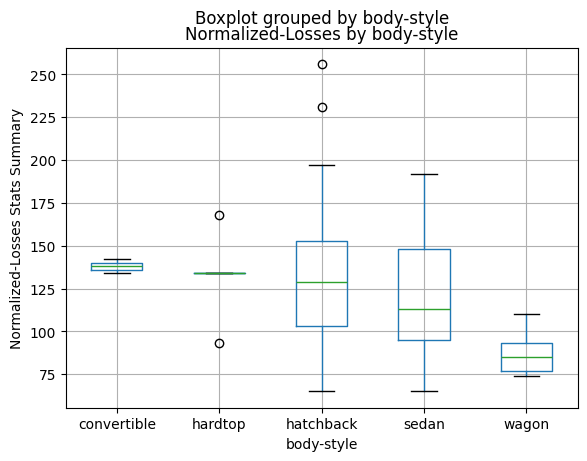

In [ ]:

autodata.boxplot(column='normalized-losses', by='body-style',  showfliers=True,
              meanprops=dict(marker='o', color='red', markersize=7))

#
#b_summary_weekday.plot(kind='bar', color='skyblue')

plot.title('Normalized-Losses by body-style')
plot.xlabel('body-style')
plot.ylabel('Normalized-Losses Stats Summary')
#plot.xticks(ticks=range(1,8), labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat' ])

# Show the plot
plot.show()

## Conclusion:  Body-style seem to play a role in normalized-losses

# (Initial visualization) Any correlation between price and normalized-losses ?  

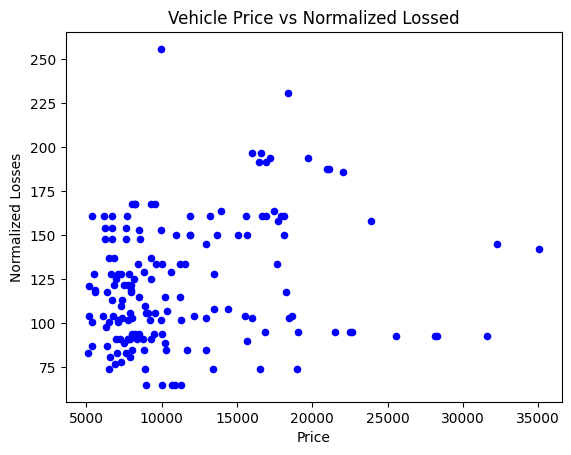

In [ ]:
autodata.plot(x='price', y='normalized-losses', kind='scatter', color='blue',  marker='o')

plot.title('Vehicle Price vs Normalized Lossed')
plot.xlabel('Price')
plot.ylabel('Normalized Losses')


# Show the plot
plot.show()

## Conclusion: There doesn't seem to be any linear pattern betweeen price and normalized losses...

# (Initial visualization) Check for linearity between horsepower and normalized-losses

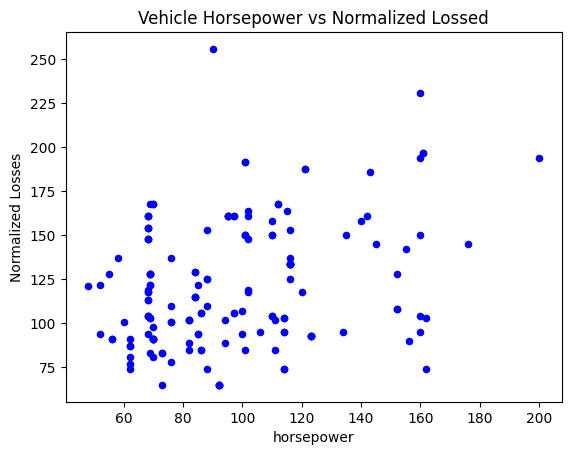

In [ ]:
autodata.plot(x='horsepower', y='normalized-losses', kind='scatter', color='blue',  marker='o')

plot.title('Vehicle Horsepower vs Normalized Lossed')
plot.xlabel('horsepower')
plot.ylabel('Normalized Losses')


# Show the plot
plot.show()

## Conclusion:  There seems to be somewhat of a linearity between horsepower and normalized-losses